# Lezione 3

## Dario Pullia

### Esercizio 03.1


La teoria di Black-Scholes parte da una ipotesi di **mercato efficiente**, quindi che, fissato un tasso di interesse *risk-free* costante r e volatilità $\sigma$, il prezzo degli asset sul mercato sia stocastico e che mostri un moto Browniano.

Queste ipotesi, che si dimostreranno errate nell'esperienza sul campo, permettono una trattazione analitica del problema. 

Le opzioni europee sono di fatto un accordo a un tempo t=0 in cui si acquista la **possibilità** di vendere o comprare in un momento T dal venditore dell'opzione un determinato bene ad un prezzo prefissato.
L'acquirente al tempo T sceglierà se usare il diritto compratosi in base al prezzo di mercato.
Tenendo conto che gli stessi soldi potrebbero essere messi in banca con un tasso di interesse **sicuro** pari a r, il profitto dell'acquirente al tempo 0 sarà:
- $C(0)=max[0,S(T)-K] \ e^{-rT}$
- $P(0)=max[0,K-S(T)] \ e^{-rT}$

Il venditore accetta di vendere se il prezzo è sufficiente a fargli correre il rischio di vendere/comprare a un prezzo peggiore di quello di mercato.

La soluzione analitica del problema risulta:
Ad un tempo t<T:
- Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

Dove $$d_1 = \frac{1}{\sigma\sqrt{T}}\left[ \ln \left( \frac{S(0)}{K} \right) + \left( r+\frac{\sigma^2}{2} T \right)\right]$$ e $$d_2=d_1-\sigma \sqrt{T}$$

Affrontiamo il problema in modo diverso. Se il mercato si comporta in modo stocastico, usando metodi MC possiamo stimare il prezzo di mercato finale e quindi ottenere il prezzo di vendita dell'opzione a t=0.

Dividendo il tempo T in sottointervalli, si può propagare il prezzo discretizzando il processo:
$$S(t_{i+1})=S(t_i)\exp\left[\left( r-\frac{1}{2}\sigma^2 \right)(t_{i+1}-t_{i})+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right], \quad Z_i \sim N(0,1)$$

Essendo questo un caso semplice si può anche campionare il prezzo al tempo T in modo diretto:
$$S(T)=S(0)\exp\left[\left( r-\frac{1}{2}\sigma^2 \right)T+\sigma W(T)\right], \quad W(T) \sim N(0,T)$$

Campiono i prezzi M=1000000 volte divisi in N=100 blocchi.

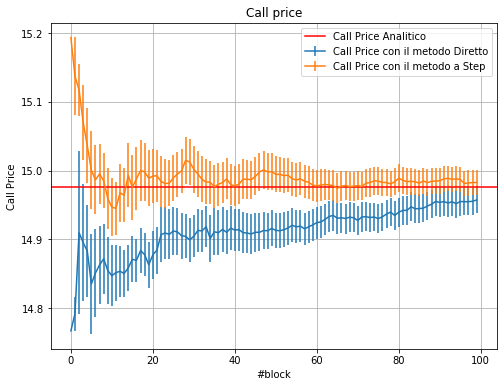

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


N=100
CallPriceDir, CallPriceDirError,PutPriceDir, PutPriceDirError,CallPriceStep, CallPriceStepError,PutPriceStep, PutPriceStepError,  = np.loadtxt("/home/dario/Uni_ubu/lsn/03/data01/data01.dat", usecols=(0,1,2,3,4,5,6,7), delimiter=' ', unpack='true')
x = np.arange(N) 
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,CallPriceDir, yerr=CallPriceDirError, label="Call Price con il metodo Diretto")
plt.errorbar(x,CallPriceStep, yerr=CallPriceStepError,label="Call Price con il metodo a Step")

plt.title('Call price')

plt.xlabel('#block')
plt.ylabel('Call Price')
plt.axhline(y = 14.97579, color = 'r', linestyle = '-',label="Call Price Analitico")
plt.grid(True)
plt.legend()
plt.show()






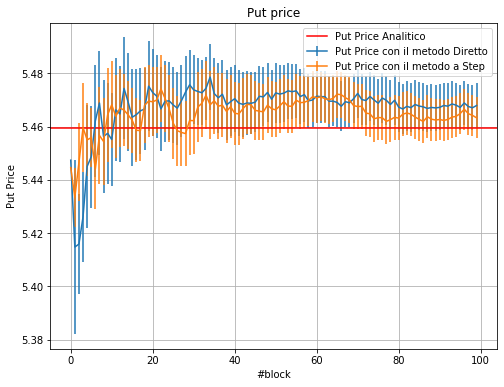

In [5]:
fig=plt.figure(figsize=(8, 6))
plt.errorbar(x,PutPriceDir, yerr=PutPriceDirError, label="Put Price con il metodo Diretto")
plt.errorbar(x,PutPriceStep, yerr=PutPriceStepError, label="Put Price con il metodo a Step")
plt.title('Put price')
plt.xlabel('#block')
plt.ylabel('Put Price')
plt.axhline(y =5.45953, color = 'r', linestyle = '-', label="Put Price Analitico")
plt.grid(True)
plt.legend()
plt.show()



La stima MC è in accordo con la predizione analitica.

Nell'avventura in borsa di Black-Scholes si è reso evidente che la borsa ha una grande componente emotiva e che non è così semplice prevedere i prezzi nel futuro. Le tecniche MC sono però uno strumento potente per studiare questo genere di sistemi complessi non fisici. 